<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Final-Project-Check-in" data-toc-modified-id="Final-Project-Check-in-1">Final Project Check-in</a></span></li><li><span><a href="#Group-Name" data-toc-modified-id="Group-Name-2">Group Name</a></span></li><li><span><a href="#Student-Names" data-toc-modified-id="Student-Names-3">Student Names</a></span></li><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-4">Load Data</a></span></li><li><span><a href="#Fit-scikit-learn-model" data-toc-modified-id="Fit-scikit-learn-model-5">Fit scikit-learn model</a></span></li><li><span><a href="#Evaluation-Metric" data-toc-modified-id="Evaluation-Metric-6">Evaluation Metric</a></span></li></ul></div>

Final Project Check-in
------

Group Name
-----

Kakkle 

Student Names
----

1. Annette (Zijun) Lin
2. Ming-Chuan Tsai
3. Kathy Yi

Load Data
-----

Literature:
https://journals.openedition.org/mediterranee/6863 <- mentions large fires were categorized as >100ha

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
df = pd.read_csv("forestfires.csv")

df['month'] = df['month'].map({'mar':3, 'oct':10, 'aug':8, 'sep':9, 'apr':4, 'jun':6, 'jul':7, 'feb':2, 'jan':1,
       'dec':12, 'may':5, 'nov':11})
df['day'] = df['day'].map({'fri': 5, 'tue': 2, 'sat': 6, 'sun': 7, 'mon': 1, 'wed': 3, 'thu':4})

df.loc[df.area >= 100, 'label'] = "large"
df.loc[(df.area >= 30) & (df.area < 100), 'label'] = "medium"
df.loc[(df.area < 30), 'label'] = "small"
y = df.iloc[:,-1].values
X = df.iloc[:,:-2].values

array(['small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'small', 'small', 'small', 'small', 'small', 'small',
       'small', 'sma

In [99]:
not_high

43

In [100]:
test_list = sorted(y)

last_third = test_list.count('large')
middle_third = test_list.count('medium')
first_third = test_list.count('small') 

not_high = first_third + middle_third
total = first_third + middle_third + last_third
first_third_total = round(first_third*100/total, 2)
print(f'Target values that are not categorized as "high" in 2008 is: {round(not_high*100/total, 2)}%\
\nThis is unbalanced.')
print(first_third_total)

Target values that are not categorized as "high" in 2008 is: 97.87%
This is unbalanced.
91.68


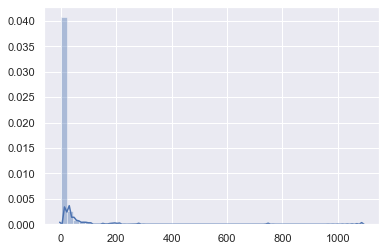

In [7]:
# original target values 
sns.set(color_codes=True)
sns.distplot(y)

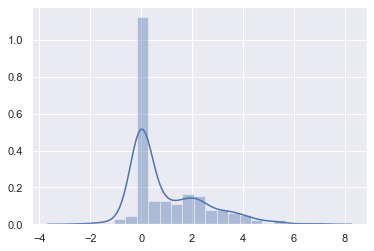

In [85]:
# log target values
log_y = np.log(y)
# new_items = [x if (x !=float('-inf')) else 0 for x in np.log(y)]
sns.distplot(new_items)
sorted_new = sorted((pd.unique(new_items)))


Fit scikit-learn model
----

In [132]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.metrics import mean_squared_log_error, f1_score, accuracy_score, recall_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import seaborn as sns
palette = "Dark2"
%matplotlib inline

import imblearn

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [125]:
vis_X = df[['X', 'Y', 'label']]
#  'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH','wind', 'rain',

vis_X.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,label
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,E
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,E
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,E
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,E
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,E


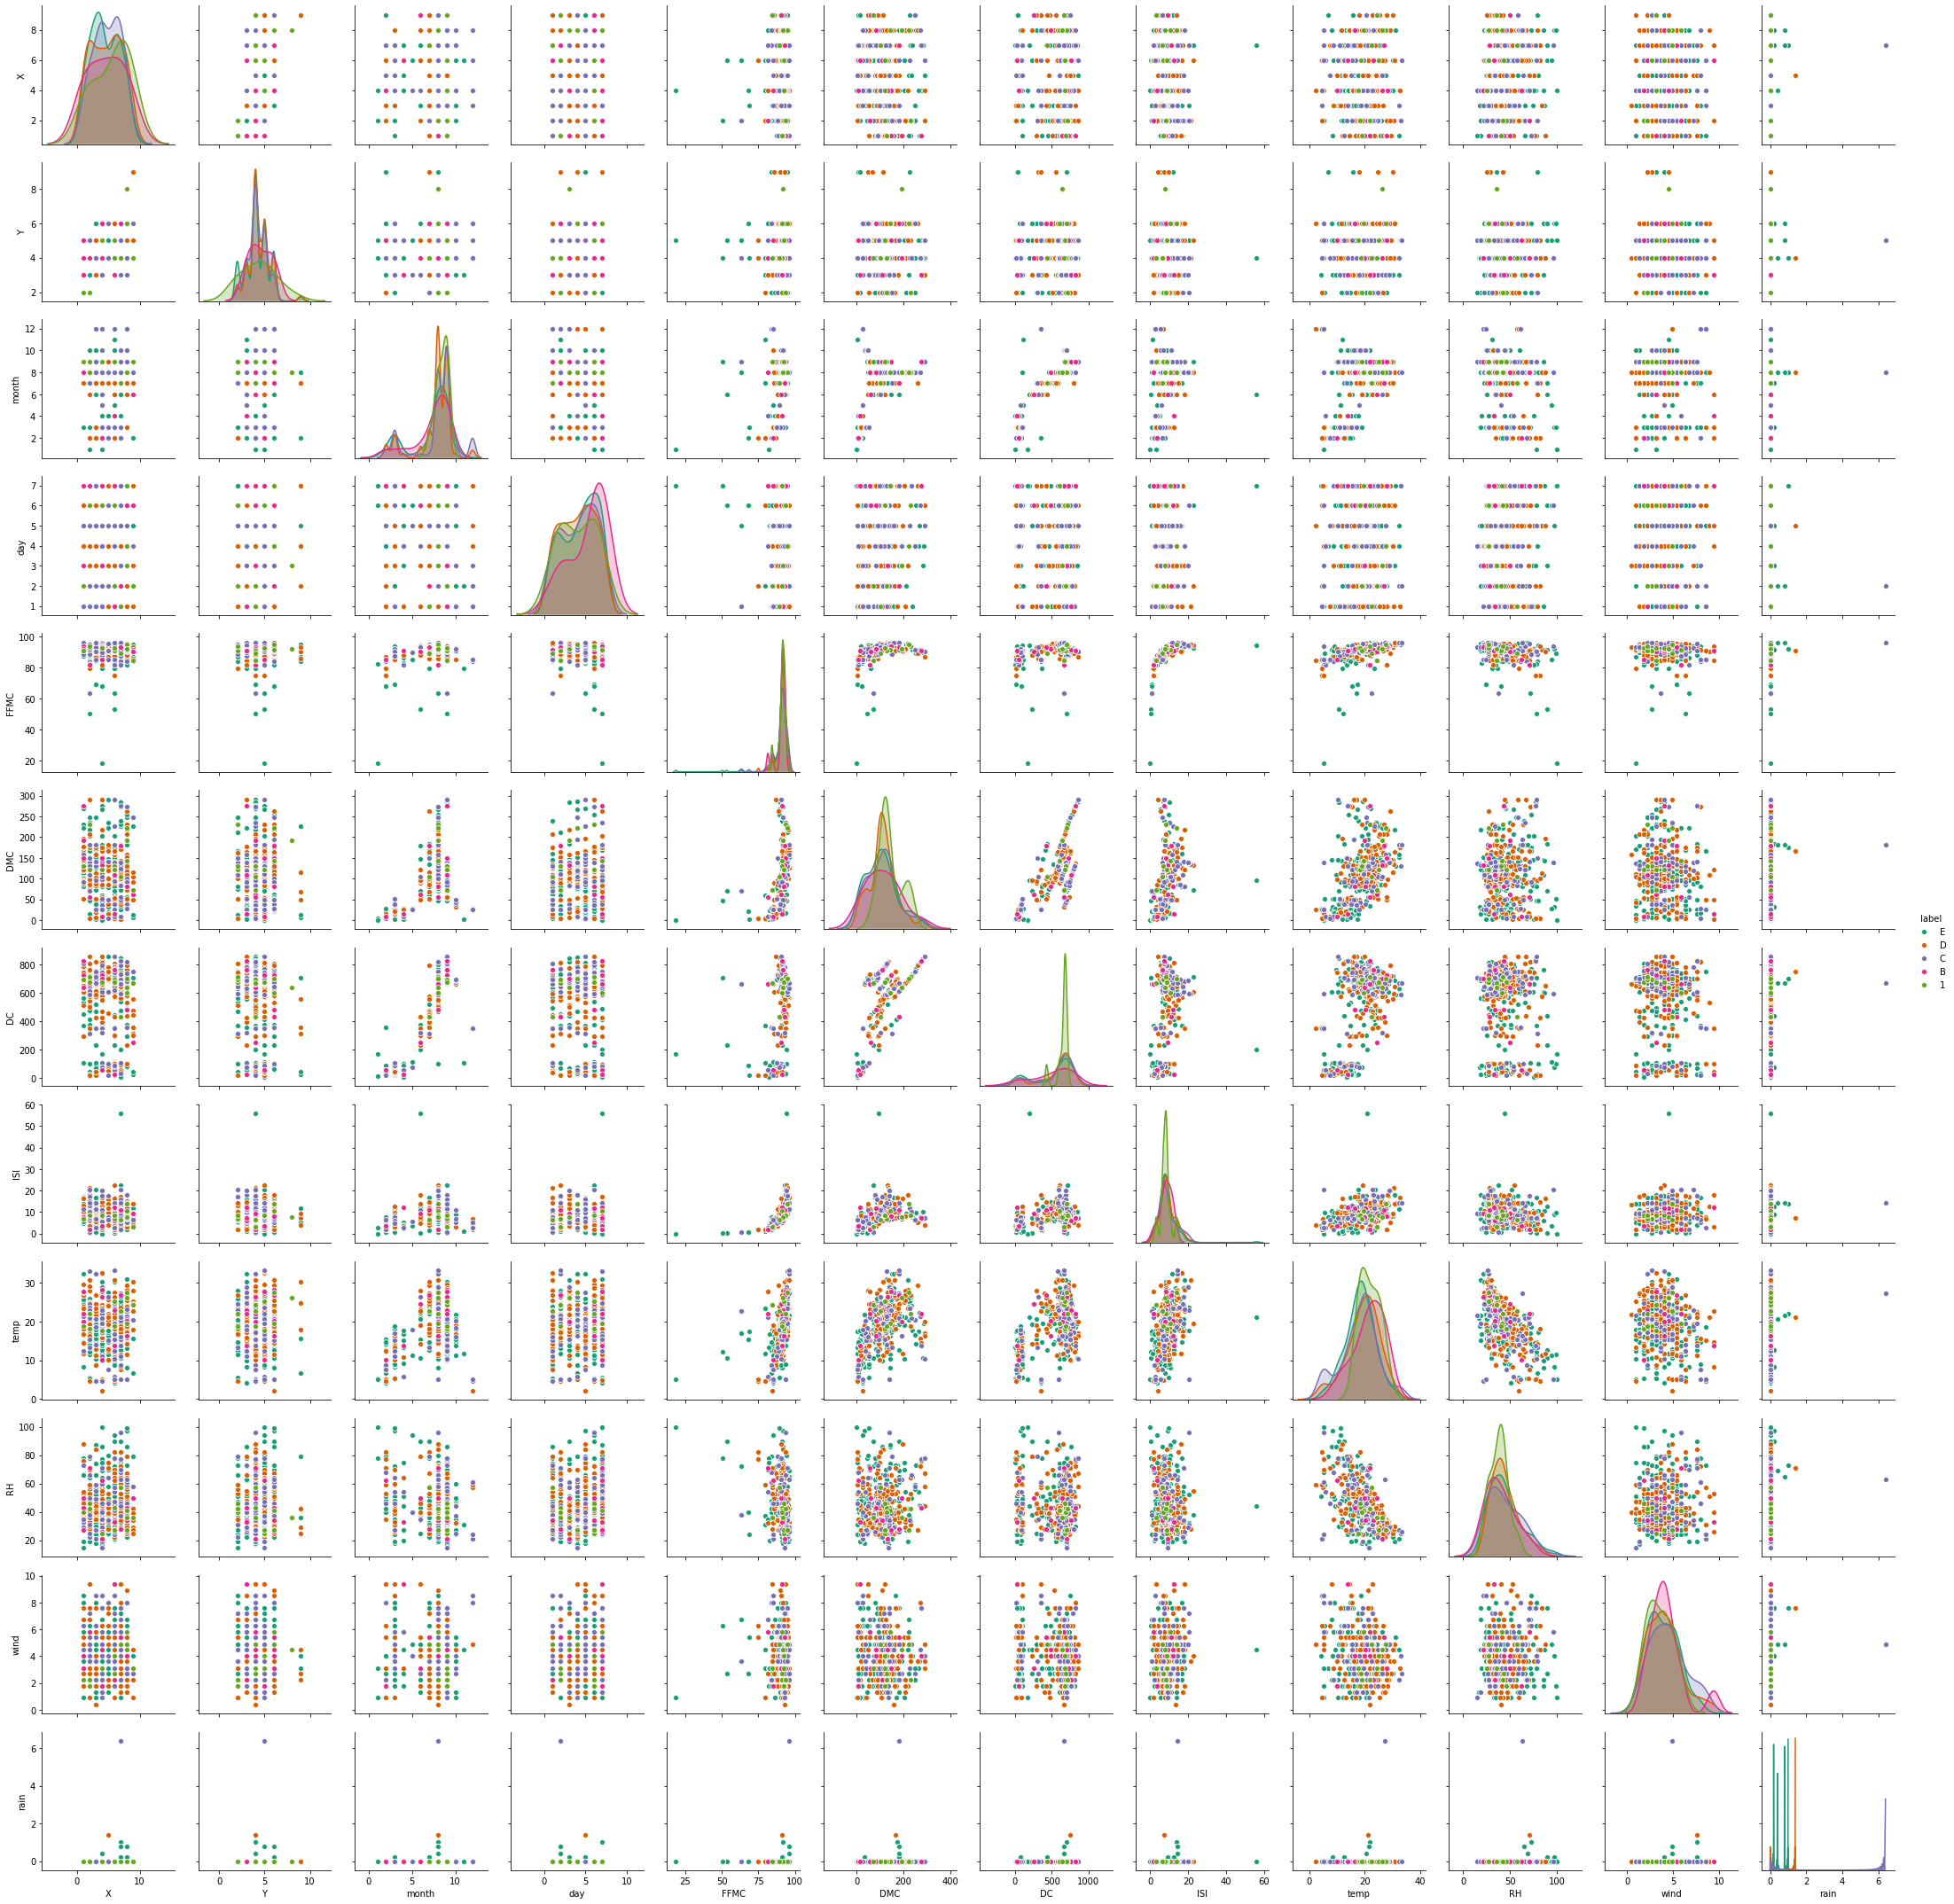

In [126]:
sns.pairplot(vis_X, hue='label', size=2.5, palette=palette)

In [102]:
# from sklearn.linear_model imporddddt LinearRegression
# lr = LinearRegression(normalize=True)
reg = linear_model.Ridge(alpha=.7)
reg.fit(X_train, y_train)
f1_score(X_test, y_test)
reg.coef_

ValueError: could not convert string to float: 'small'

In [96]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [146]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression() # TODO: Replace with your choice of hyperparameters 
clf.fit(X=X_val_train_smote, y=y_val_train_smote)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [147]:
pipe_lr = Pipeline([('scl', StandardScaler()),
                     ('clf', LogisticRegression())])
pipe_knn = Pipeline([('scl', StandardScaler()),
                     ('knn', KNeighborsClassifier(n_neighbors = 5))])
# pipe_lr.fit(X_val_train_smote, y_val_train_smote)
# pipe_knn.fit(X_val_train_smote, y_val_train_smote)

# OR 

pipe_lr.fit(X_train, y_train)
pipe_knn.fit(X_train, y_train)
# print(f"The test set accuracy - {pipe_lr.score(X_test, y_test):.2%}")

Pipeline(memory=None,
         steps=[('scl',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [105]:
rebalance_instance = imblearn.over_sampling.SMOTE()

In [148]:
X_val_train_smote, y_val_train_smote = rebalance_instance.fit_sample(X_train, y_train)

In [162]:
def predict(pipeline):
    y_train_predicted = pipeline.predict(X_train)
    y_test_predicted = pipeline.predict(X_test)


def metrics(train, train_predicted, test, test_predicted)
    print(f"{f1_score(train, train_predicted, average='weighted'):.4f} recall on training dataset.\n\
    {f1_score(test, test_predicted, average='weighted'):.4f} recall on test dataset.")

0.8772 recall on training dataset.
0.9427 recall on training dataset.


Evaluation Metric
----